# 实验内容:曲线拟合

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
train_x = np.load('train_x.npy')
train_y = np.load('train_y.npy')
test_x = np.load('test_x.npy')
test_y = np.load('test_y.npy')

In [41]:
train_x.shape, test_x.shape

((1, 32), (1, 100))

In [42]:
train_y.shape, test_y.shape

((1, 32), (1, 100))

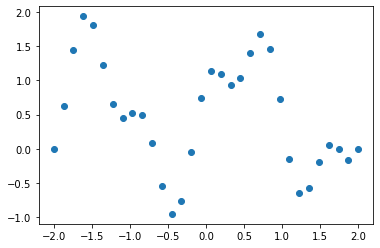

In [43]:
#训练集散点图
plt.scatter(train_x[0],train_y[0])

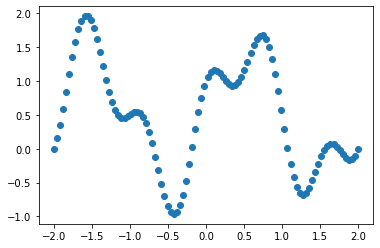

In [44]:
#测试集散点图
plt.scatter(test_x[0],test_y[0])

In [45]:
train_dataset = []  # 训练集
test_dataset = []   # 测试集
for i in range(train_x.shape[1]):
    train_dataset.append([train_x[:,i][0],train_y[:,i][0]])
for i in range(test_x.shape[1]):
    test_dataset.append([test_x[:,i][0],test_y[:,i][0]])

In [46]:
import torch 
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim

In [47]:
train_batch_size = 4         #每批处理的训练集数据
test_batch_size = 4          #每批处理的测试集数据
learning_rate = 0.001        #学习率
num_epoches = 10000          #训练数据集的轮次

In [48]:
#训练集
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
#测试集
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [49]:
model = nn.Sequential(
            nn.Linear(1,256),
            nn.Tanh(),
            nn.Linear(256,1024),
            nn.Tanh(),
            nn.Linear(1024,256),
            nn.Tanh(),
            nn.Linear(256,1)
        )
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=1024, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1024, out_features=256, bias=True)
  (5): Tanh()
  (6): Linear(in_features=256, out_features=1, bias=True)
)


In [50]:
# 损失器
criterion = nn.MSELoss().to(device)
# 优化器
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.99)

In [51]:
train_loss = []         
test_loss = []

In [52]:
for epoch in range(num_epoches):
    print('epoch:',epoch)
            
    model.train()
    for _,data in enumerate(train_loader,0):
        inputs, labels = data[0],data[1]
        inputs = inputs.view(train_batch_size,1)  
        labels = labels.view(train_batch_size,1)  
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() # 每次训练梯度清零
        outputs = model(inputs.float())
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()


    model.eval()
    running_loss = 0.0             
    total = 0             
    with torch.no_grad(): 
        for _,data in enumerate(train_loader,0):
            inputs, labels = data
            inputs = inputs.view(train_batch_size,1)
            labels = labels.view(train_batch_size,1)
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs.float())
            loss = criterion(outputs, labels.float())
            running_loss += loss.item()
            total += labels.size(0)                   # 总样本个数加 1
    train_loss.append(running_loss/total)
    print("训练集上的损失：%.6f" % (running_loss / total))

    
    model.eval()
    running_loss = 0.0          
    total = 0             
    with torch.no_grad(): 
        for _,data in enumerate(test_loader,0):
            inputs, labels = data
            inputs = inputs.view(test_batch_size,1)
            labels = labels.view(test_batch_size,1)
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs.float())
            loss = criterion(outputs, labels.float())
            running_loss += loss.item()
            total += labels.size(0)                  
    test_loss.append(running_loss / total)
    print("测试集上的损失：%.6f" % (running_loss / total))
    
    torch.save(model.state_dict(), f'./model/model_{epoch}.pkl')

epoch: 0
训练集上的损失：0.140690
测试集上的损失：0.142095
epoch: 1
训练集上的损失：0.212856
测试集上的损失：0.211357
epoch: 2
训练集上的损失：0.140009
测试集上的损失：0.141365
epoch: 3
训练集上的损失：0.200592
测试集上的损失：0.204999
epoch: 4
训练集上的损失：0.165121
测试集上的损失：0.168475
epoch: 5
训练集上的损失：0.135922
测试集上的损失：0.136796
epoch: 6
训练集上的损失：0.145614
测试集上的损失：0.144857
epoch: 7
训练集上的损失：0.136366
测试集上的损失：0.137244
epoch: 8
训练集上的损失：0.149123
测试集上的损失：0.151660
epoch: 9
训练集上的损失：0.137489
测试集上的损失：0.139050
epoch: 10
训练集上的损失：0.150472
测试集上的损失：0.148060
epoch: 11
训练集上的损失：0.137685
测试集上的损失：0.137439
epoch: 12
训练集上的损失：0.219298
测试集上的损失：0.223971
epoch: 13
训练集上的损失：0.141357
测试集上的损失：0.140102
epoch: 14
训练集上的损失：0.184682
测试集上的损失：0.178467
epoch: 15
训练集上的损失：0.195647
测试集上的损失：0.198350
epoch: 16
训练集上的损失：0.141971
测试集上的损失：0.144212
epoch: 17
训练集上的损失：0.166700
测试集上的损失：0.166477
epoch: 18
训练集上的损失：0.129348
测试集上的损失：0.126606
epoch: 19
训练集上的损失：0.156072
测试集上的损失：0.154922
epoch: 20
训练集上的损失：0.140447
测试集上的损失：0.140945
epoch: 21
训练集上的损失：0.126249
测试集上的损失：0.127217
epoch: 22
训练集上的损失：0.139964
测试集上的损失：0.14068

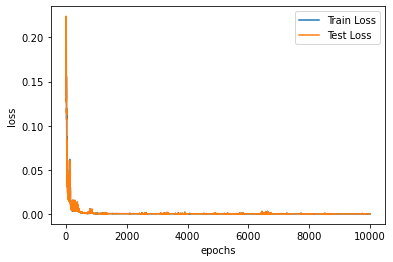

In [53]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(np.arange(len(train_loss)), train_loss)
plt.plot(np.arange(len(test_loss)), test_loss)
plt.legend(['Train Loss','Test Loss'])

In [54]:
train_pred = np.zeros(train_y.shape)
for i in range(train_x.shape[1]):
    output = model(torch.tensor(train_x[:,i][0]).view(1,1).to(device).float())
    train_pred[:,i] = output.data.cpu()[0][0]

In [55]:
test_pred = np.zeros(test_y.shape)
for i in range(test_x.shape[1]):
    output = model(torch.tensor(test_x[:,i][0]).view(1,1).to(device).float())
    test_pred[:,i] = output.data.cpu()[0][0]

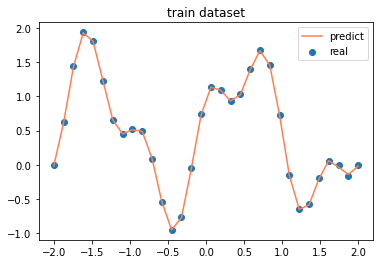

In [56]:
plt.title('train dataset')
plt.scatter(train_x[0],train_y[0])
plt.plot(train_x[0],train_pred[0], color='coral')
plt.legend(['predict','real'])

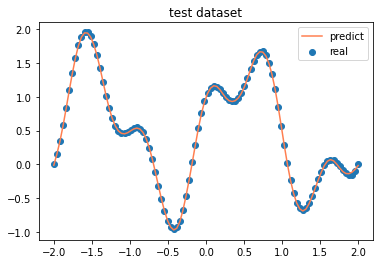

In [57]:
plt.title('test dataset')
plt.scatter(test_x[0],test_y[0])
plt.plot(test_x[0],test_pred[0], color='coral')
plt.legend(['predict','real'])